<a href="https://colab.research.google.com/github/saakeeth/c-/blob/main/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#reading the data
ds=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unemployment_python/Unemployment_Rate_upto_11_2020.csv')
ds.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
print(ds.describe())

        Estimated Unemployment Rate (%)   Estimated Employed  \
count                        267.000000         2.670000e+02   
mean                          12.236929         1.396211e+07   
std                           10.803283         1.336632e+07   
min                            0.500000         1.175420e+05   
25%                            4.845000         2.838930e+06   
50%                            9.650000         9.732417e+06   
75%                           16.755000         2.187869e+07   
max                           75.850000         5.943376e+07   

        Estimated Labour Participation Rate (%)   longitude    latitude  
count                                267.000000  267.000000  267.000000  
mean                                  41.681573   22.826048   80.532425  
std                                    7.845419    6.270731    5.831738  
min                                   16.770000   10.850500   71.192400  
25%                                   37.265000   18.

In [ ]:
#checking for null values
ds.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
#renaming the columns
ds.columns=['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed',
            'Estimated Labour Participation Rate','Region','latitude','longitude']

In [ ]:
print(ds)

             States         Date Frequency  Estimated Unemployment Rate  \
0    Andhra Pradesh   31-01-2020         M                         5.48   
1    Andhra Pradesh   29-02-2020         M                         5.83   
2    Andhra Pradesh   31-03-2020         M                         5.79   
3    Andhra Pradesh   30-04-2020         M                        20.51   
4    Andhra Pradesh   31-05-2020         M                        17.43   
..              ...          ...       ...                          ...   
262     West Bengal   30-06-2020         M                         7.29   
263     West Bengal   31-07-2020         M                         6.83   
264     West Bengal   31-08-2020         M                        14.87   
265     West Bengal   30-09-2020         M                         9.35   
266     West Bengal   31-10-2020         M                         9.98   

     Estimated Employed  Estimated Labour Participation Rate Region  latitude  \
0              166

<ipython-input-9-831c5ecfdc33>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(),cmap='coolwarm')


<Axes: >

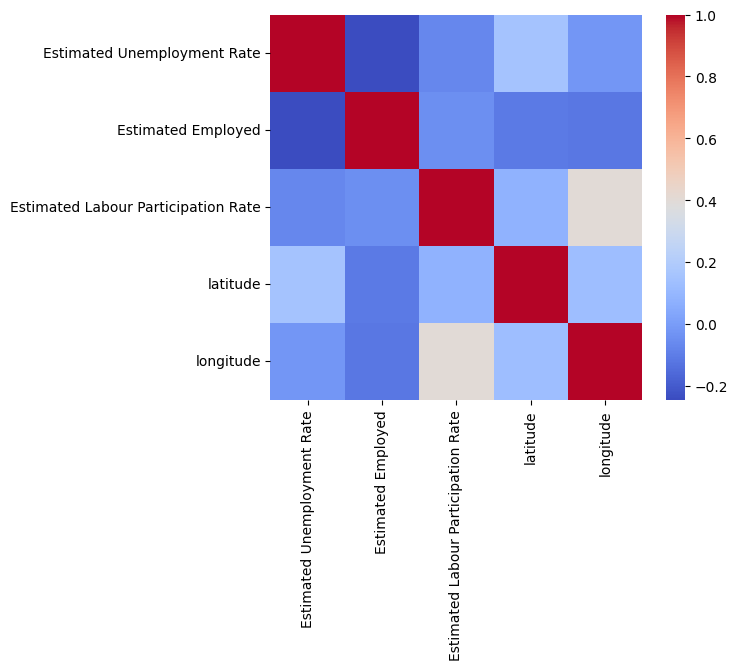

In [ ]:
#correlation between the properties of the data set
# plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6,5))
sns.heatmap(ds.corr(),cmap='coolwarm')

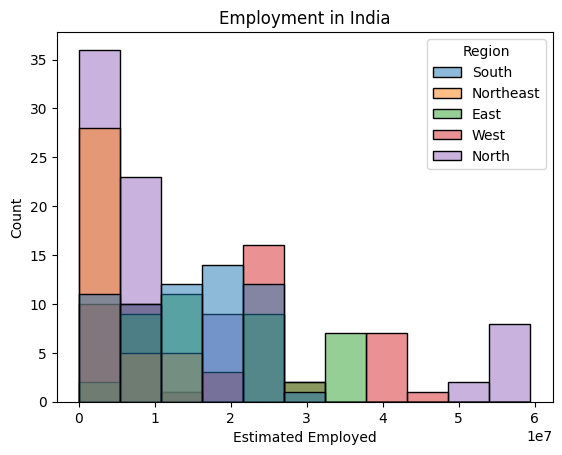

In [ ]:
#Analyse the estimated employees
# ds.columns=['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed',
#             'Estimated Labour Participation Rate','Region','latitude','longitude']
plt.title('Employment in India')
sns.histplot(x='Estimated Employed',hue='Region',data=ds)
plt.show()

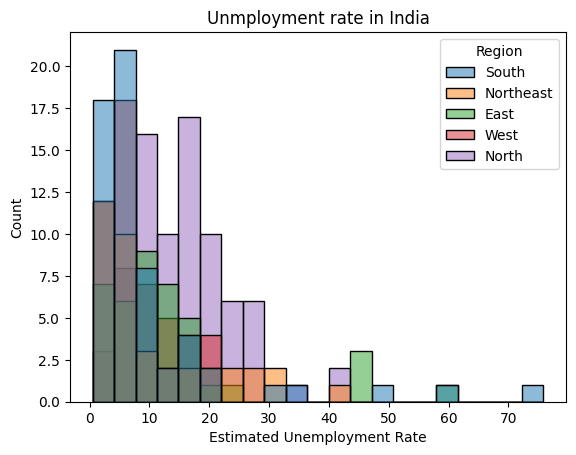

In [ ]:
plt.title('Unmployment rate in India')
sns.histplot(x='Estimated Unemployment Rate',hue='Region',data=ds)
plt.show()

In [ ]:
# Analysis of the unemployment state wise by creating a dashboard
unemployment = ds[['States','Region','Estimated Unemployment Rate']]
# using double brackets, you are creating a new DataFrame that contains only the specified columns ('States', 'Region', 'Estimated Unemployment Rate') from the original dataset ds.
figure = px.sunburst(unemployment,path=['Region','States'],values='Estimated Unemployment Rate',title='Unemployment Rate in India')
figure.show()